## 0. Import Libraries

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from xclim import sdba
from glob import glob
from shapely.geometry import mapping

import xclim
import utils


%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Open Data

In [3]:
# change if needed
bias_algo = 'QDM' # EQM or QDM

path_general = r'/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data'
path_coeff = r'data/bias_correction'
season = 'DJF' # DJF or JJA

### 1.1 Model

In [4]:
year_range = np.arange(1985, 2006)
yearly_paths = glob(fr'{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr_zeroed*')
yearly_paths = yearly_paths[:21] # drop clipped and merged data, check here
yearly_paths

['/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1985.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1986.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1987.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1988.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1989.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1990.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1991.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1992.nc',
 '/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR

### 1.2 Shapefile

In [5]:
def clip_to_city(data, shapefile):
    
    clipped = data.rio.clip(shapefile.geometry.apply(mapping),
                            shapefile.crs, all_touched=True, 
                            invert=False, from_disk=True)
    
    return clipped

In [6]:
path_shape = fr'data/shapefiles/Iller_HGK_6360_Kanun_Sonrasi.shp'
shape_tr = gpd.read_file(path_shape)

In [7]:
wet_hour_mm = 0.1

for year, year_path in enumerate(yearly_paths):
    
    # open data
    dt_model = xr.open_dataset(year_path)
    
    print('data open')
    
    # clip to turkey
    dt_model_clipped = clip_to_city(utils.assign_proj_to_model(dt_model.transpose('time', 'rlat', 'rlon')), shape_tr)
    dt_model_clipped = dt_model_clipped.rename({'scen':'TOT_PREC'}).copy(deep=True)
    
    #dt_model.close()
    dt_model_clipped.to_netcdf(fr"{path_general}/cosmo/yearly/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_1hr_clipped_{year_range[year]}.nc",
                              )
    
    print(year_path)

data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1985.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1986.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1987.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1988.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1989.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1990.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1991.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data/cosmo/yearly/BC/BC_QDM_Tr011_MPI_RF_PR_DJF_1hr_zeroed_1992.nc
data open
/mnt/d/JupyterLab/Yuksek_Lisan

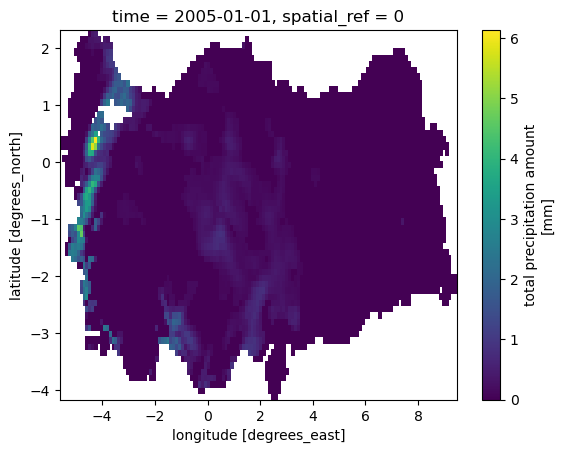

In [8]:
dt_model_clipped['TOT_PREC'][0].plot()